<a href="https://colab.research.google.com/github/Clonlyfan/Clonlyfan/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Gender Purchase Amount Analysis:
T-Statistic: 2.802346432847978
P-Value: 0.011777351932902084
Null Hypothesis: No significant difference in purchase amounts between genders
Interpretation: p < 0.05 would indicate a statistically significant difference

Product Category ANOVA:
F-Statistic: 31.19176430671237
P-Value: 4.1339188541953985e-07
Null Hypothesis: No significant difference in purchase amounts across product categories
Interpretation: p < 0.05 would indicate statistically significant differences

Chi-Square Test - Repeat Customers:
Chi-Square Statistic: 4.615384615384616
P-Value: 0.32908422779068536
Null Hypothesis: No association between product category and repeat customer status
Interpretation: p < 0.05 would indicate a significant association

Correlation Analysis - Age vs Purchase Amount:
Pearson Correlation: 0.6867656901406137
P-Value: 0.0008240

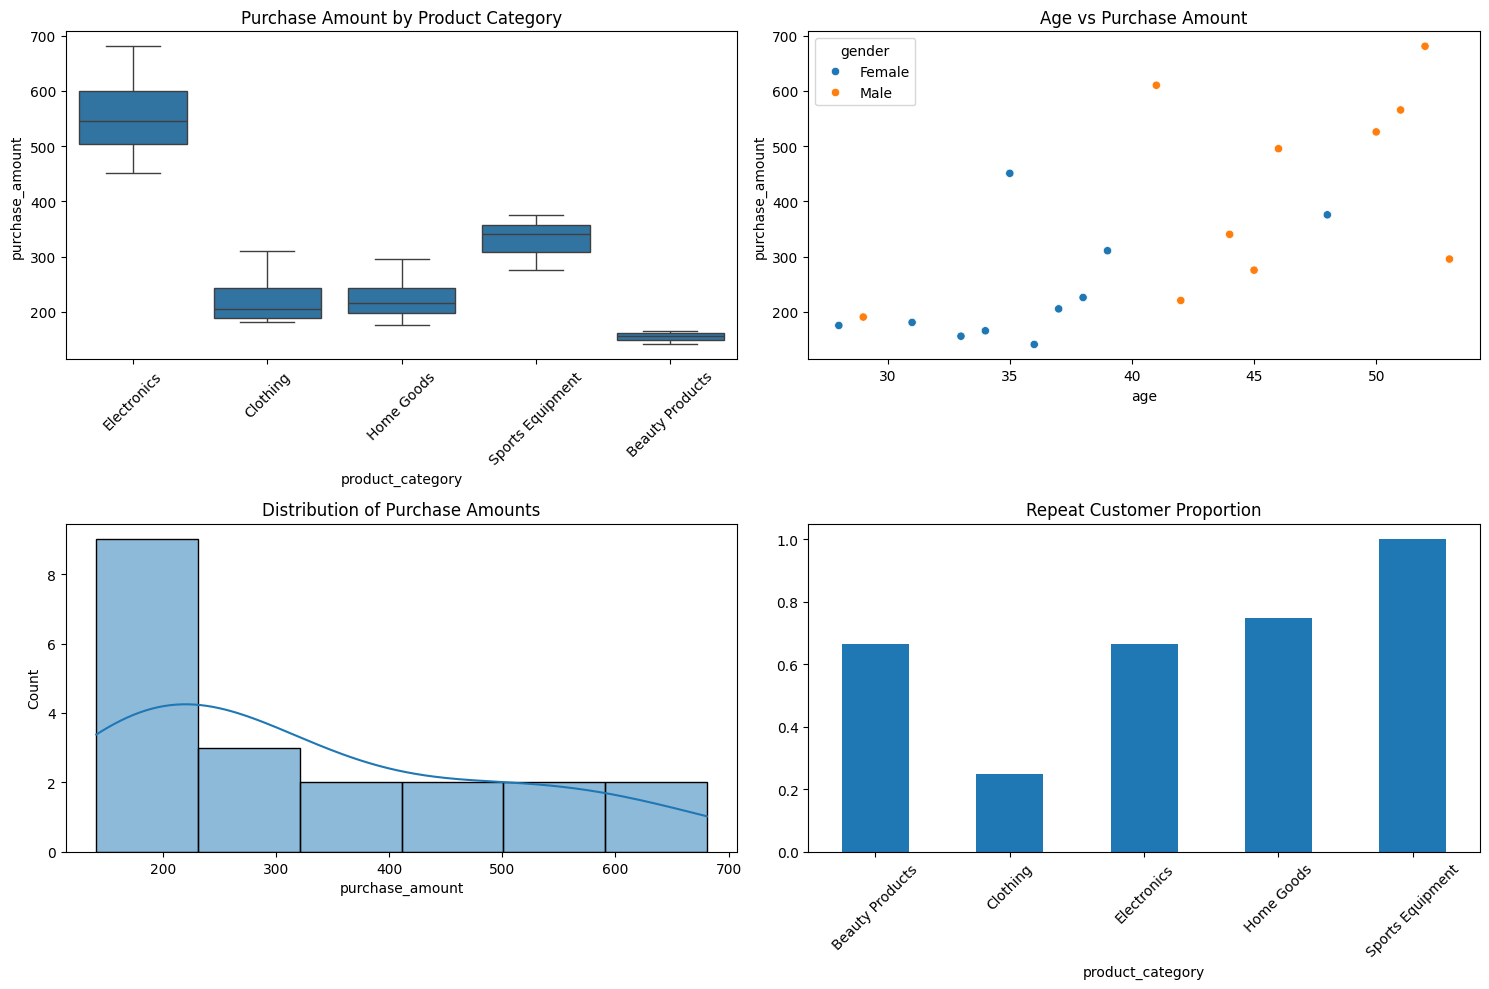

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/') # Corrected indentation
file_path = '/content/drive/MyDrive/sales-performance-dataset.txt'  # Replace with the actual path
df = pd.read_csv(file_path) # Corrected indentation
# Load the dataset

# 1. Hypothesis Testing: Purchase Amount by Gender
def gender_purchase_analysis():
    male_purchases = df[df['gender'] == 'Male']['purchase_amount']
    female_purchases = df[df['gender'] == 'Female']['purchase_amount']

    # Independent t-test
    t_statistic, p_value = stats.ttest_ind(male_purchases, female_purchases)

    print("Gender Purchase Amount Analysis:")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
    print("Null Hypothesis: No significant difference in purchase amounts between genders")
    print("Interpretation: p < 0.05 would indicate a statistically significant difference\n")

# 2. ANOVA: Purchase Amount by Product Category
def product_category_anova():
    categories = df['product_category'].unique()
    category_groups = [df[df['product_category'] == cat]['purchase_amount'] for cat in categories]

    f_statistic, p_value = stats.f_oneway(*category_groups)

    print("Product Category ANOVA:")
    print(f"F-Statistic: {f_statistic}")
    print(f"P-Value: {p_value}")
    print("Null Hypothesis: No significant difference in purchase amounts across product categories")
    print("Interpretation: p < 0.05 would indicate statistically significant differences\n")

# 3. Chi-Square Test: Repeat Customers vs Product Category
def chi_square_repeat_customers():
    contingency_table = pd.crosstab(df['product_category'], df['is_repeat_customer'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print("Chi-Square Test - Repeat Customers:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p_value}")
    print("Null Hypothesis: No association between product category and repeat customer status")
    print("Interpretation: p < 0.05 would indicate a significant association\n")

# 4. Correlation Analysis with Confidence Intervals
def correlation_analysis():
    # Correlation between age and purchase amount
    correlation, p_value = stats.pearsonr(df['age'], df['purchase_amount'])

    # Confidence Interval for Correlation
    n = len(df)
    r_z = np.arctanh(correlation)
    se = 1/np.sqrt(n-3)
    z = stats.norm.ppf((1 + 0.95) / 2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))

    print("Correlation Analysis - Age vs Purchase Amount:")
    print(f"Pearson Correlation: {correlation}")
    print(f"P-Value: {p_value}")
    print(f"95% Confidence Interval: [{lo}, {hi}]")
    print("Interpretation: Strength and significance of linear relationship\n")

# 5. Normality Test
def normality_test():
    # Shapiro-Wilk Test for Normality
    statistic, p_value = stats.shapiro(df['purchase_amount'])

    print("Normality Test - Purchase Amount:")
    print(f"Shapiro-Wilk Statistic: {statistic}")
    print(f"P-Value: {p_value}")
    print("Null Hypothesis: The data is normally distributed")
    print("Interpretation: p < 0.05 suggests the data is not normally distributed\n")

# Run all analyses
def main():
    gender_purchase_analysis()
    product_category_anova()
    chi_square_repeat_customers()
    correlation_analysis()
    normality_test()

# Visualizations
def create_visualizations():
    plt.figure(figsize=(15,10))

    # Boxplot of Purchase Amount by Product Category
    plt.subplot(2,2,1)
    sns.boxplot(x='product_category', y='purchase_amount', data=df)
    plt.title('Purchase Amount by Product Category')
    plt.xticks(rotation=45)

    # Scatter plot of Age vs Purchase Amount
    plt.subplot(2,2,2)
    sns.scatterplot(x='age', y='purchase_amount', hue='gender', data=df)
    plt.title('Age vs Purchase Amount')

    # Distribution of Purchase Amounts
    plt.subplot(2,2,3)
    sns.histplot(df['purchase_amount'], kde=True)
    plt.title('Distribution of Purchase Amounts')

    # Repeat Customer Proportion by Category
    plt.subplot(2,2,4)
    repeat_prop = df.groupby('product_category')['is_repeat_customer'].mean()
    repeat_prop.plot(kind='bar')
    plt.title('Repeat Customer Proportion')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Execute the script
if __name__ == "__main__":
    main()
    create_visualizations()

In [ ]:
df.head(2)

,customer_id,age,gender,location,product_category,purchase_amount,is_repeat_customer,customer_satisfaction,days_since_last_purchase,annual_income,education_level
0,1,35,Female,New York,Electronics,450.75,1,4.5,12,65000,Bachelor's
1,2,42,Male,Los Angeles,Clothing,220.50,0,3.8,45,82000,Master's
